In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
#import geopandas
import branca
#from geopandas import GeoDataFrame
from folium.features import GeoJson, GeoJsonTooltip

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-EddOselotl/master/airbnb_clean.csv")

In [23]:
df.head()

,id,name,host_id,host_since,host_total_listings_count,latitude,longitude,neighbourhood_cleansed,property_type,room_type,square_feet,price,review_scores_rating,z_score
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,2010-03-03,9,19.44076,-99.16324,Cuauhtémoc,Boutique hotel,Private room,248.0,2331.0,98.0,0.258975
1,35797,Villa Dante,153786,2010-06-28,2,19.38399,-99.27335,Cuajimalpa de Morelos,Villa,Entire home/apt,32292.0,4457.0,NaN,0.766780
2,56074,Great space in historical San Rafael,265650,2010-10-19,2,19.43937,-99.15614,Cuauhtémoc,Condominium,Entire home/apt,646.0,809.0,97.0,-0.104562
3,58955,Entire beautiful duplex in la Roma,282620,2010-11-09,1,19.42292,-99.15775,Cuauhtémoc,Loft,Entire home/apt,1184.0,1932.0,100.0,0.163672
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,2010-11-26,1,19.41259,-99.17959,Cuauhtémoc,House,Private room,161.0,1364.0,98.0,0.028002


In [24]:
df.describe()

,id,host_id,host_total_listings_count,latitude,longitude,square_feet,price,review_scores_rating,z_score
count,2.157200e+04,2.157200e+04,21572.000000,21572.000000,21572.000000,70.000000,21572.000000,16439.000000,21572.000000
mean,2.810705e+07,1.207037e+08,6.381235,19.398220,-99.167631,1045.071429,1094.957723,95.061683,-0.036260
std,1.118104e+07,9.655023e+07,19.622541,0.045367,0.034630,3877.157574,1248.864035,8.682695,0.298297
min,2.278700e+04,7.365000e+03,0.000000,19.168170,-99.340270,0.000000,22.000000,20.000000,-0.292541
25%,1.981210e+07,3.616692e+07,1.000000,19.373868,-99.179892,0.000000,401.000000,94.000000,-0.202015
50%,2.990944e+07,1.002619e+08,2.000000,19.410610,-99.168140,237.000000,705.000000,97.000000,-0.129403
75%,3.810157e+07,1.900038e+08,4.000000,19.429780,-99.153090,855.750000,1293.000000,100.000000,0.011043
max,4.352733e+07,3.469379e+08,491.000000,19.557340,-98.968570,32292.000000,13637.000000,100.000000,2.959466


In [27]:
print(len(df))

21572


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21572 entries, 0 to 21571
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21572 non-null  int64  
 1   name                       21565 non-null  object 
 2   host_id                    21572 non-null  int64  
 3   host_since                 21572 non-null  object 
 4   host_total_listings_count  21572 non-null  int64  
 5   latitude                   21572 non-null  float64
 6   longitude                  21572 non-null  float64
 7   neighbourhood_cleansed     21572 non-null  object 
 8   property_type              21572 non-null  object 
 9   room_type                  21572 non-null  object 
 10  square_feet                70 non-null     float64
 11  price                      21572 non-null  float64
 12  review_scores_rating       16439 non-null  float64
 13  z_score                    21572 non-null  flo

In [41]:
df.isnull().sum()

id                               0
name                             7
host_id                          0
host_since                       0
host_total_listings_count        0
latitude                         0
longitude                        0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
square_feet                  21502
price                            0
review_scores_rating          5133
z_score                          0
dtype: int64

Index(['id', 'name', 'host_id', 'host_since', 'host_total_listings_count',
       'latitude', 'longitude', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'square_feet', 'price', 'review_scores_rating', 'z_score'],
      dtype='object')

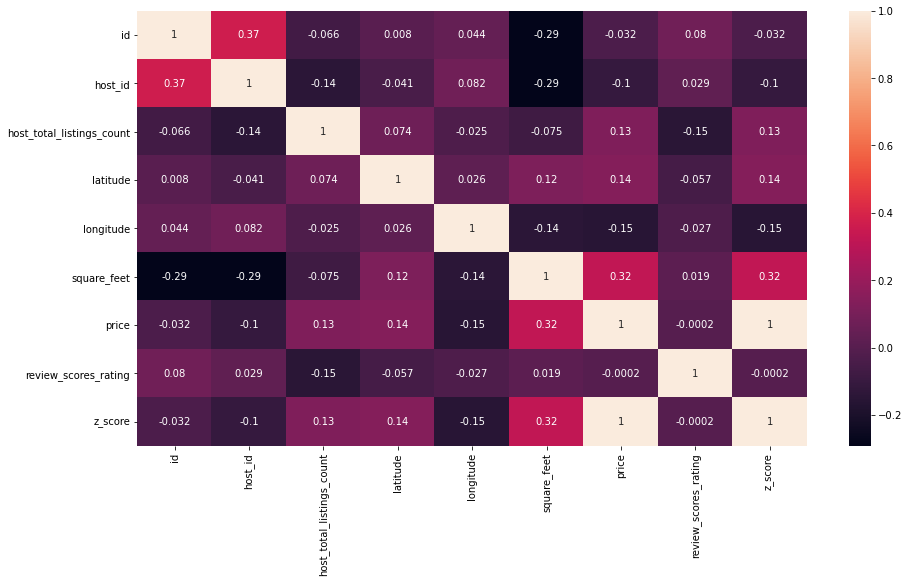

In [39]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

Text(0.5, 1.0, 'Neighbourhood')

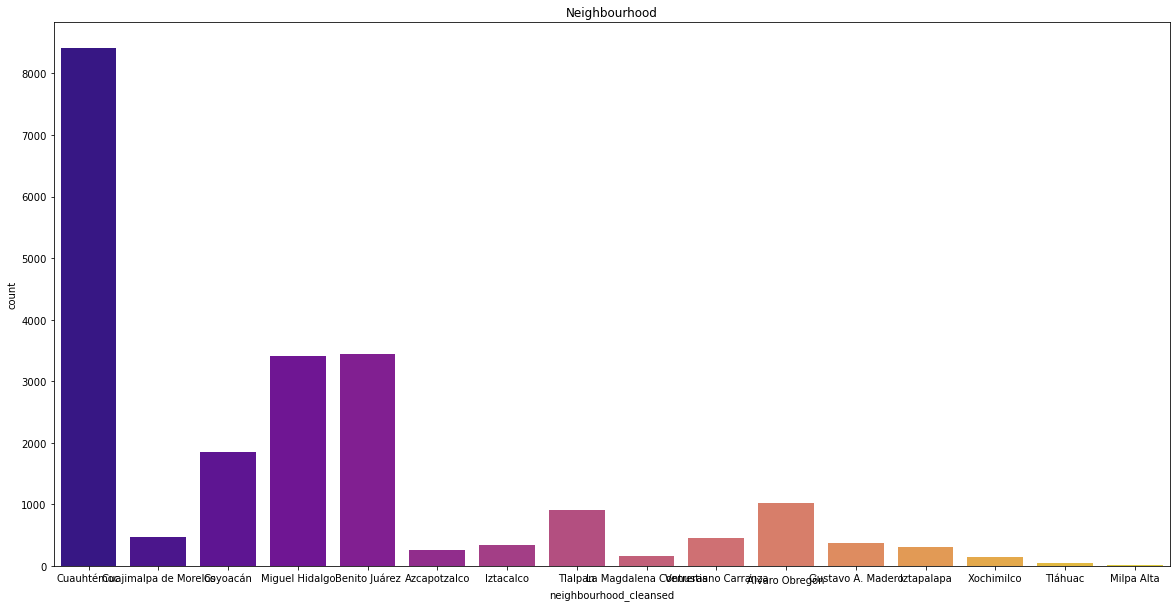

In [46]:
#listAlc = df["neighbourhood_cleansed"].unique()
#listAlc

sns.countplot(df["neighbourhood_cleansed"], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhood')

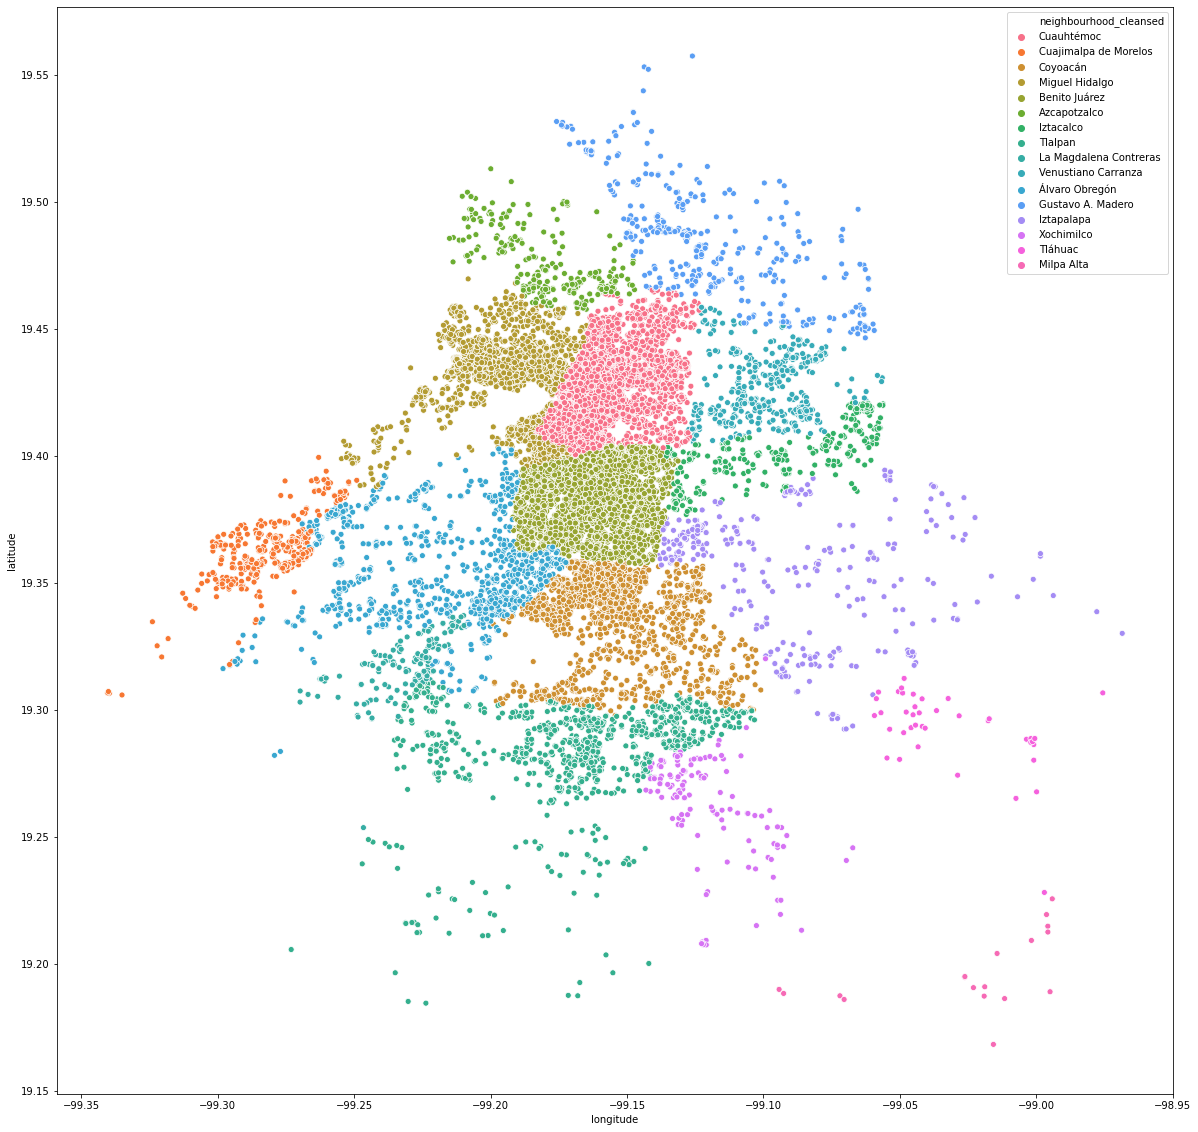

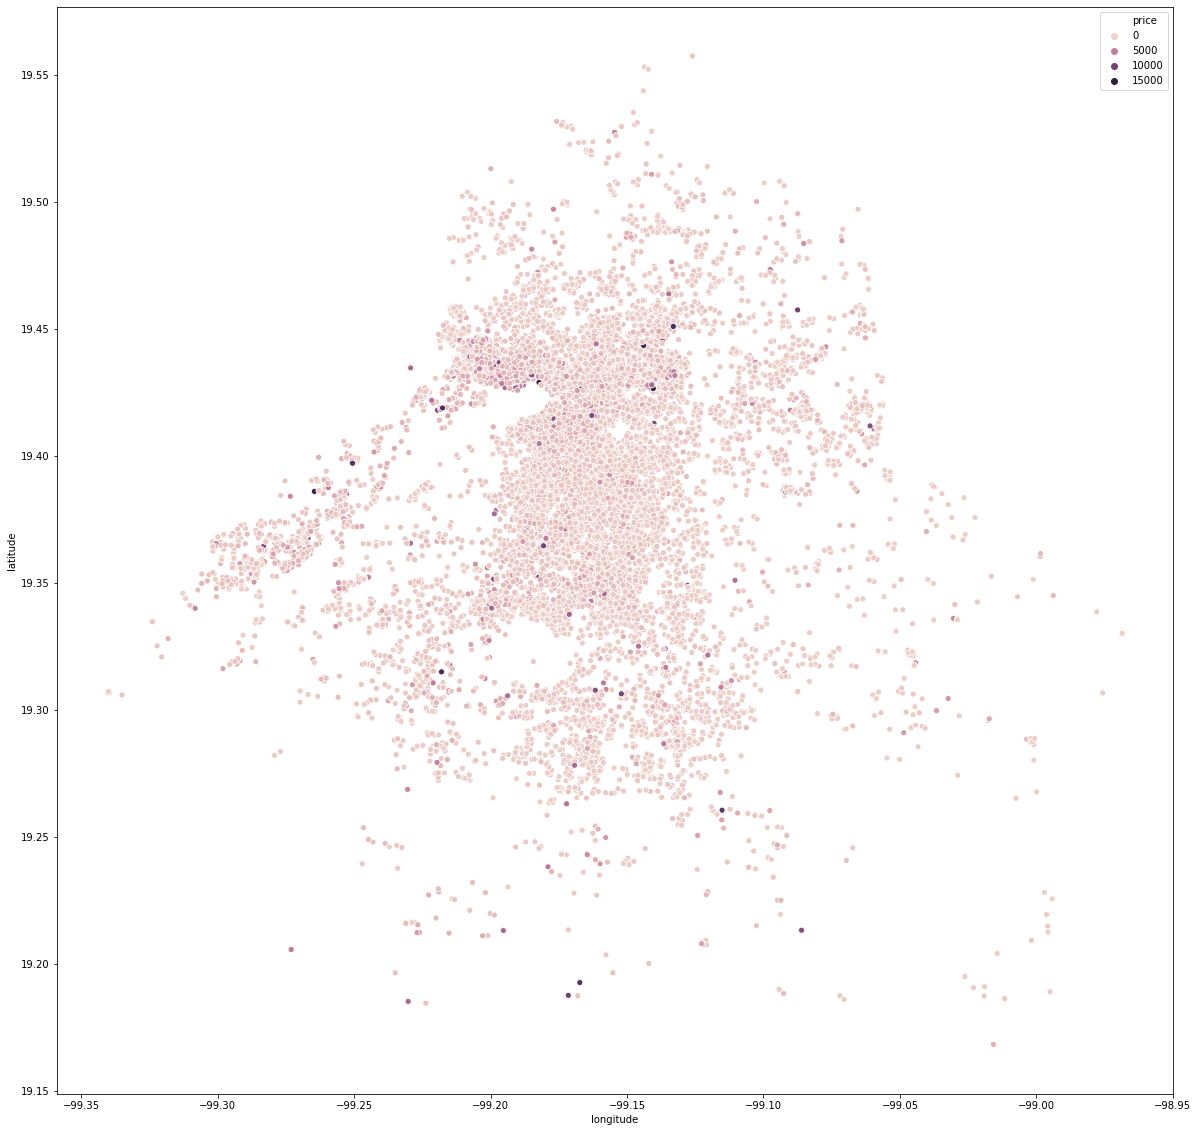

In [52]:
plt.figure(figsize=(20,20))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed)
plt.ioff()

plt.figure(figsize=(20,20))
sns.scatterplot(df.longitude,df.latitude,hue=df.price)
plt.ioff()

In [37]:
(df.groupby("neighbourhood_cleansed").agg(frecuencia=("neighbourhood_cleansed", "count"),
                                          media_precios =("price","mean"),
                                          mediana_precios =("price","median"),
                                          min_precios=("price","min"),
                                          max_precios=("price","max")).sort_values(by=["frecuencia"],ascending=False))

,frecuencia,media_precios,mediana_precios,min_precios,max_precios
neighbourhood_cleansed,,,,,
Cuauhtémoc,8411,1274.670432,909.0,45.0,13637.0
Benito Juárez,3436,802.038417,580.0,45.0,11994.0
Miguel Hidalgo,3416,1474.877927,1006.0,181.0,13148.0
Coyoacán,1858,817.597417,501.5,22.0,11315.0
Álvaro Obregón,1021,1008.186092,650.0,178.0,12595.0
Tlalpan,902,681.784922,401.0,134.0,11364.0
Cuajimalpa de Morelos,463,1331.602592,981.0,159.0,13149.0
Venustiano Carranza,447,664.152125,490.0,178.0,4992.0
Gustavo A. Madero,364,651.456044,401.0,89.0,10007.0
